<a href="https://colab.research.google.com/github/Rutujabhonde18/DataScience_Internship/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font><h1><b>OASIS INFOBYTE INTERNSHIP September-23</b></h1></font>
<font><h2><b><i>DATA SCIENCE</i></b></h2></font>

<font><h2><b><u>Task 5 : 'SALES PREDICTION USING PYTHON' </u></b></h2></font>

<font><h3><b>Intern : Rutuja Madan Bhonde</b></h3></font>

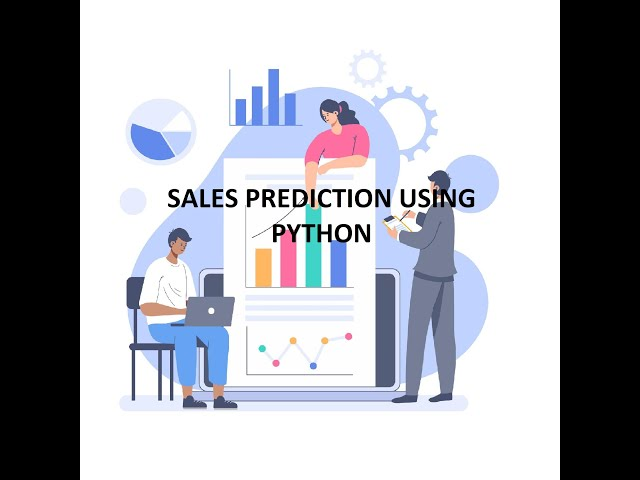

**PROBLEM STATEMENT** : ''Sales prediction means predicting how much of a product people will buy based on factors like, amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.''

So here we, predict sales with machine learning using Python in which we predict future sales with every step take to manipulate the cost of advertising the product.

# **Importing Libraries**

In [ ]:
# Import libraries for Analysis
import numpy as np
import pandas as pd
import re

# Import Libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Import Libraries for decision
from sklearn.linear_model import LinearRegression

# Import Libraries for check Performance
from sklearn.preprocessing import StandardScaler

# Import Libraries for check r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Import Libraries for train_test_split
from sklearn.model_selection import train_test_split

# **Import dataset**

In [ ]:
# Import dataset into data variable
data = pd.read_csv("/content/Advertising.csv")

# **Data Analysis**

In [ ]:
# show dataset
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


* Here, we don't need Unnamed column so, we can drop them.

In [ ]:
data = data.drop(columns = ['Unnamed: 0'])

In [ ]:
#To get first 10 rows
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
#To get last 10 rows
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
# Check rows & columns
data.shape

(200, 4)

In [ ]:
# Basic status about data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# To get information about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# To check null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* Now, our data is clear. There will be no unnecessary columns and no null values in dataset.

# **Data Exploration**

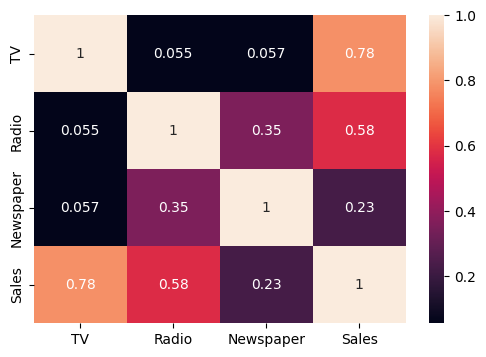

In [ ]:
# Plot Heatmap to find correlation
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

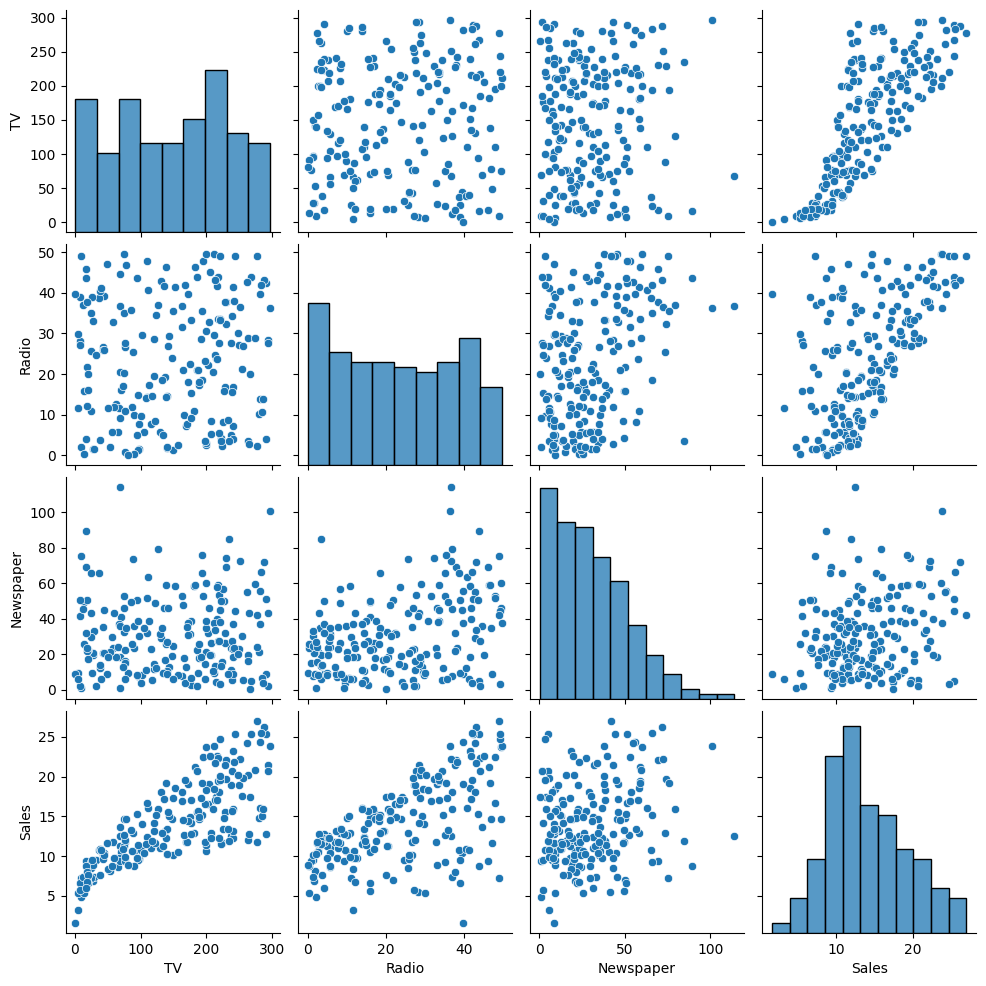

In [ ]:
# Plot pairplot
plt.figure(figsize=(5,5))
sns.pairplot(data=data)

<Axes: >

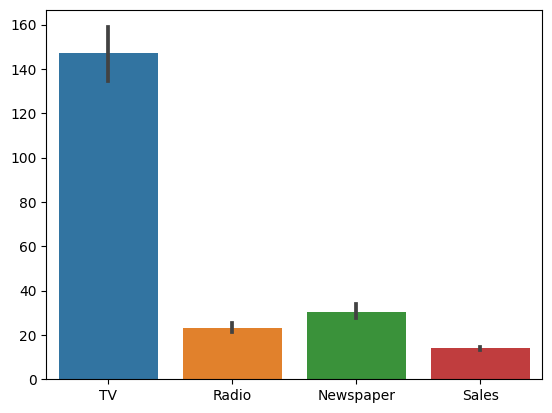

In [ ]:
sns.barplot(data = data)

* So, we can see that.. our most sales can be done by TV advertisment.

# **Model Building**

**feature selection**

In [ ]:
X = data.drop('Sales',axis=1)
y = data['Sales']

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Spliting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [ ]:
# scaled the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

**Model Selection (Linear regresion)**

In [ ]:
Model=LinearRegression()
Model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
#prediction of model
y_pred = Model.predict(X_test_scaled)
y_pred

array([16.58534325, 20.93766365, 21.34568189, 11.24650542, 22.11385227,
       13.54751052, 21.06342583,  8.04754087, 13.68240487, 15.32768341,
        9.6773921 ,  7.22465671, 14.3372533 ,  9.59784578, 10.01397456,
       12.37840059,  9.40720081, 16.37840097, 10.7604122 , 18.81617532,
       19.51892748, 13.67198022, 12.90878406, 21.1929471 ,  8.37148519,
        6.40180812, 20.7712911 , 12.29336321,  9.65041037,  9.20182049,
       12.60817226, 10.51389422, 21.41676363, 12.82955411, 18.12766392,
       20.11098404, 14.58544413, 20.69293515, 11.40010316,  5.24234371])

# **Performance of Model**

In [ ]:
# r2_score
print(r2_score(y_test,y_pred))
# mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
# mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.8863195562008255
1.4542808000700942
3.5881633453968527


**Conclussion**

  - So, the Accuracy of our model is 88%.
  - We can say that it is a good model.